



# Kondycja demograficzna powiatów w Polsce. Analiza demograficzna powiatów w Polsce na podstawie danych GUS dotyczących ludności, migracji zewnętrznych i wewnętrznych oraz ruchu naturalnego.





In [16]:
import pandas as pd
import numpy as np


## Ludność

In [17]:
df_ludnosc = pd.read_csv('data/ludnosc_gus.csv', sep=';', dtype={'Kod': str})
df_ludnosc

,Kod,Nazwa,Wiek,Płeć,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,0201000,Powiat bolesławiecki,w wieku przedprodukcyjnym,mężczyźni,2018,8138,osoba,NaN,NaN
1,0201000,Powiat bolesławiecki,w wieku przedprodukcyjnym,mężczyźni,2019,8125,osoba,NaN,NaN
2,0201000,Powiat bolesławiecki,w wieku przedprodukcyjnym,mężczyźni,2020,8221,osoba,NaN,NaN
3,0201000,Powiat bolesławiecki,w wieku przedprodukcyjnym,mężczyźni,2021,8207,osoba,NaN,NaN
4,0201000,Powiat bolesławiecki,w wieku przedprodukcyjnym,mężczyźni,2022,8120,osoba,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13675,3263000,Powiat m. Świnoujście,w wieku poprodukcyjnym,kobiety,2019,7144,osoba,NaN,NaN
13676,3263000,Powiat m. Świnoujście,w wieku poprodukcyjnym,kobiety,2020,7213,osoba,NaN,NaN
13677,3263000,Powiat m. Świnoujście,w wieku poprodukcyjnym,kobiety,2021,7198,osoba,NaN,NaN
13678,3263000,Powiat m. Świnoujście,w wieku poprodukcyjnym,kobiety,2022,7256,osoba,NaN,NaN


In [18]:
print("Lista kolumn:", df_ludnosc.columns.tolist())

for col in df_ludnosc.columns:
    print(f"\nKolumna: {col}")
    unique_vals = df_ludnosc[col].unique()

    if len(unique_vals) < 50:
        print(unique_vals)
    else:
        print(f"(Za dużo wartości: {len(unique_vals)}. Przykłady: {unique_vals[:5]})")

Lista kolumn: ['Kod', 'Nazwa', 'Wiek', 'Płeć', 'Rok', 'Wartosc', 'Jednostka miary', 'Atrybut', 'Unnamed: 8']

Kolumna: Kod
(Za dużo wartości: 380. Przykłady: ['0201000' '0202000' '0203000' '0204000' '0205000'])

Kolumna: Nazwa
(Za dużo wartości: 370. Przykłady: ['Powiat bolesławiecki' 'Powiat dzierżoniowski' 'Powiat głogowski'
 'Powiat górowski' 'Powiat jaworski'])

Kolumna: Wiek
['w wieku przedprodukcyjnym' 'w wieku produkcyjnym'
 'w wieku poprodukcyjnym']

Kolumna: Płeć
['mężczyźni' 'kobiety']

Kolumna: Rok
[2018 2019 2020 2021 2022 2023]

Kolumna: Wartosc
(Za dużo wartości: 10640. Przykłady: [8138 8125 8221 8207 8120])

Kolumna: Jednostka miary
['osoba']

Kolumna: Atrybut
[nan]

Kolumna: Unnamed: 8
[nan]


In [19]:
dziwne_wartosci = ['-', 'n/a', 'N/A', '?', 'brak']
print(df_ludnosc.isin(dziwne_wartosci).sum())


Kod                0
Nazwa              0
Wiek               0
Płeć               0
Rok                0
Wartosc            0
Jednostka miary    0
Atrybut            0
Unnamed: 8         0
dtype: int64


In [20]:
df_ludnosc = df_ludnosc.rename(columns={
    'Kod': 'id_powiatu',
    'Rok': 'rok',
    'Wiek': 'grupa_wieku',
    'Płeć': 'plec',
    'Wartosc': 'liczba_osob'
})


selected_columns = ['id_powiatu', 'rok', 'plec', 'grupa_wieku', 'liczba_osob']

df_ludnosc_final = df_ludnosc[selected_columns].copy()

mapa_wiek = {
    'w wieku przedprodukcyjnym':'przedprodukcyjny',
    'w wieku produkcyjnym':'produkcyjny',
    'w wieku poprodukcyjnym':'poprodukcyjny'
}

mapa_plec = {
    'kobiety':'K',
    'mężczyźni':'M'
}
df_ludnosc_final['grupa_wieku'] = df_ludnosc_final['grupa_wieku'].replace(mapa_wiek)
df_ludnosc_final['plec'] = df_ludnosc_final['plec'].replace(mapa_plec)

print("Liczba wierszy:", df_ludnosc_final.shape[0])
print("Podgląd gotowej tabeli:")
display(df_ludnosc_final)

df_ludnosc_final.to_csv('clean_data/ludnosc_gus.csv', index=False, encoding='utf-8')

Liczba wierszy: 13680
Podgląd gotowej tabeli:


,id_powiatu,rok,plec,grupa_wieku,liczba_osob
0,0201000,2018,M,przedprodukcyjny,8138
1,0201000,2019,M,przedprodukcyjny,8125
2,0201000,2020,M,przedprodukcyjny,8221
3,0201000,2021,M,przedprodukcyjny,8207
4,0201000,2022,M,przedprodukcyjny,8120
...,...,...,...,...,...
13675,3263000,2019,K,poprodukcyjny,7144
13676,3263000,2020,K,poprodukcyjny,7213
13677,3263000,2021,K,poprodukcyjny,7198
13678,3263000,2022,K,poprodukcyjny,7256


## Migracje zewnętrzne i wewnętrzne

In [21]:
df_migracje = pd.read_csv('data/migracje_gus.csv', sep=';', dtype={'Kod': str})
df_migracje.head()

,Kod,Nazwa,Kierunki migracji,Płeć,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,0201000,Powiat bolesławiecki,zameldowania ogółem,mężczyźni,2018,661,osoba,NaN,NaN
1,0201000,Powiat bolesławiecki,zameldowania ogółem,mężczyźni,2019,673,osoba,NaN,NaN
2,0201000,Powiat bolesławiecki,zameldowania ogółem,mężczyźni,2020,588,osoba,NaN,NaN
3,0201000,Powiat bolesławiecki,zameldowania ogółem,mężczyźni,2021,664,osoba,NaN,NaN
4,0201000,Powiat bolesławiecki,zameldowania ogółem,mężczyźni,2022,590,osoba,NaN,NaN


In [22]:
print('Kierunki migracji \n')
print(df_migracje['Kierunki migracji'].unique()[:4])

print('\nNazwa: \n')
print(df_migracje['Nazwa'].unique()[:4])

print('\nRok: \n')
print(df_migracje['Rok'].unique())

print('\nKierunki migracji: \n')
print(df_migracje['Kierunki migracji'].unique())

print('\nPłeć: \n')
print(df_migracje['Płeć'].unique())

print('\nWartosc: \n')
print(df_migracje['Jednostka miary'].unique()[:4])

print(df_migracje.isnull().sum())

dziwne_wartosci = ['-', 'n/a', 'N/A', '?', 'brak', 'nan']
print("Dziwne wartości:", df_migracje.isin(dziwne_wartosci).sum())

Kierunki migracji 

['zameldowania ogółem' 'wymeldowania ogółem' 'saldo migracji ogółem']

Nazwa: 

['Powiat bolesławiecki' 'Powiat dzierżoniowski' 'Powiat głogowski'
 'Powiat górowski']

Rok: 

[2018 2019 2020 2021 2022 2023]

Kierunki migracji: 

['zameldowania ogółem' 'wymeldowania ogółem' 'saldo migracji ogółem']

Płeć: 

['mężczyźni' 'kobiety']

Wartosc: 

['osoba']
Kod                      0
Nazwa                    0
Kierunki migracji        0
Płeć                     0
Rok                      0
Wartosc                  0
Jednostka miary          0
Atrybut              13674
Unnamed: 8           13680
dtype: int64
Dziwne wartości: Kod                  0
Nazwa                0
Kierunki migracji    0
Płeć                 0
Rok                  0
Wartosc              0
Jednostka miary      0
Atrybut              0
Unnamed: 8           0
dtype: int64


In [23]:
df_migracje = df_migracje.rename(columns={
    'Kod': 'id_powiatu',
    'Nazwa': 'nazwa_powiatu',
    'Rok': 'rok',
    'Kierunki migracji': 'typ_migracji',
    'Płeć': 'plec',
    'Wartosc': 'liczba_osob'
})

selected_columns = ['id_powiatu', 'nazwa_powiatu', 'rok', 'plec', 'typ_migracji', 'liczba_osob']

mapa_plec = {
    'kobiety':'K',
    'mężczyźni':'M'
}

mapa_migracji = {
    'zameldowania ogółem': 'zameldowania',
    'wymeldowania ogółem': 'wymeldowania',
    'saldo migracji ogółem': 'saldo migracji'
}


df_migracje_final = df_migracje[selected_columns].copy()

df_migracje_final['plec'] = df_migracje_final['plec'].replace(mapa_plec)
df_migracje_final['typ_migracji'] = df_migracje_final['typ_migracji'].replace(mapa_migracji)

print("Liczba wierszy:", df_migracje_final.shape[0])
print("Podgląd gotowej tabeli:")

display(df_migracje_final.head())
# print(df_migracje_final['typ_migracji'].unique())

df_migracje_final.to_csv('clean_data/migracje_gus.csv', index=False, encoding='utf-8')

Liczba wierszy: 13680
Podgląd gotowej tabeli:


,id_powiatu,nazwa_powiatu,rok,plec,typ_migracji,liczba_osob
0,0201000,Powiat bolesławiecki,2018,M,zameldowania,661
1,0201000,Powiat bolesławiecki,2019,M,zameldowania,673
2,0201000,Powiat bolesławiecki,2020,M,zameldowania,588
3,0201000,Powiat bolesławiecki,2021,M,zameldowania,664
4,0201000,Powiat bolesławiecki,2022,M,zameldowania,590


## Ruch naturalny

In [24]:
df_ruch_naturalny = pd.read_csv('data/ruch_naturalny_gus.csv', sep=';', dtype={'Kod': str})
df_ruch_naturalny

,Kod,Nazwa,Ruch naturalny,Płeć,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,0201000,Powiat bolesławiecki,Urodzenia żywe,mężczyźni,2018,428,-,NaN,NaN
1,0201000,Powiat bolesławiecki,Urodzenia żywe,mężczyźni,2019,415,-,NaN,NaN
2,0201000,Powiat bolesławiecki,Urodzenia żywe,mężczyźni,2020,409,-,NaN,NaN
3,0201000,Powiat bolesławiecki,Urodzenia żywe,mężczyźni,2021,384,-,NaN,NaN
4,0201000,Powiat bolesławiecki,Urodzenia żywe,mężczyźni,2022,321,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9115,3263000,Powiat m. Świnoujście,Zgony ogółem,kobiety,2019,245,-,NaN,NaN
9116,3263000,Powiat m. Świnoujście,Zgony ogółem,kobiety,2020,223,-,NaN,NaN
9117,3263000,Powiat m. Świnoujście,Zgony ogółem,kobiety,2021,306,-,NaN,NaN
9118,3263000,Powiat m. Świnoujście,Zgony ogółem,kobiety,2022,266,-,NaN,NaN


In [25]:
print("Lista kolumn:", df_ruch_naturalny.columns.tolist())

for col in df_ruch_naturalny.columns:
    print(f"\nKolumna: {col}")
    unique_vals = df_ruch_naturalny[col].unique()

    if len(unique_vals) < 50:
        print(unique_vals)
    else:
        print(f"(Za dużo wartości: {len(unique_vals)}. Przykłady: {unique_vals[:5]})")

Lista kolumn: ['Kod', 'Nazwa', 'Ruch naturalny', 'Płeć', 'Rok', 'Wartosc', 'Jednostka miary', 'Atrybut', 'Unnamed: 8']

Kolumna: Kod
(Za dużo wartości: 380. Przykłady: ['0201000' '0202000' '0203000' '0204000' '0205000'])

Kolumna: Nazwa
(Za dużo wartości: 370. Przykłady: ['Powiat bolesławiecki' 'Powiat dzierżoniowski' 'Powiat głogowski'
 'Powiat górowski' 'Powiat jaworski'])

Kolumna: Ruch naturalny
['Urodzenia żywe' 'Zgony ogółem']

Kolumna: Płeć
['mężczyźni' 'kobiety']

Kolumna: Rok
[2018 2019 2020 2021 2022 2023]

Kolumna: Wartosc
(Za dużo wartości: 1410. Przykłady: [428 415 409 384 321])

Kolumna: Jednostka miary
['-']

Kolumna: Atrybut
[nan]

Kolumna: Unnamed: 8
[nan]


In [26]:
print('Kod: \n')
print(df_ruch_naturalny['Kod'].unique()[:4])

print('\nNazwa: \n')
print(df_ruch_naturalny['Nazwa'].unique()[:4])

print('\nRok: \n')
print(df_ruch_naturalny['Rok'].unique())

print('\nRuch naturalny: \n')
print(df_ruch_naturalny['Ruch naturalny'].unique())

print('\nPłeć: \n')
print(df_ruch_naturalny['Płeć'].unique())

print('\nWartosc: \n')
print(df_ruch_naturalny['Wartosc'].unique()[:4])

print(df_ruch_naturalny.isnull().sum())

dziwne_wartosci = ['-', 'n/a', 'N/A', '?', 'brak']
print("Dziwne wartości:", df_ruch_naturalny.isin(dziwne_wartosci).sum())

Kod: 

['0201000' '0202000' '0203000' '0204000']

Nazwa: 

['Powiat bolesławiecki' 'Powiat dzierżoniowski' 'Powiat głogowski'
 'Powiat górowski']

Rok: 

[2018 2019 2020 2021 2022 2023]

Ruch naturalny: 

['Urodzenia żywe' 'Zgony ogółem']

Płeć: 

['mężczyźni' 'kobiety']

Wartosc: 

[428 415 409 384]
Kod                   0
Nazwa                 0
Ruch naturalny        0
Płeć                  0
Rok                   0
Wartosc               0
Jednostka miary       0
Atrybut            9120
Unnamed: 8         9120
dtype: int64
Dziwne wartości: Kod                   0
Nazwa                 0
Ruch naturalny        0
Płeć                  0
Rok                   0
Wartosc               0
Jednostka miary    9120
Atrybut               0
Unnamed: 8            0
dtype: int64


In [27]:
df_ruch_naturalny = df_ruch_naturalny.rename(columns={
    'Kod': 'id_powiatu',
    'Nazwa': 'nazwa_powiatu',
    'Rok': 'rok',
    'Ruch naturalny': 'typ_ruchu',
    'Płeć': 'plec',
    'Wartosc': 'liczba_osob'
})

selected_columns = ['id_powiatu', 'nazwa_powiatu', 'rok', 'plec', 'typ_ruchu', 'liczba_osob']


mapa_plec = {
    'kobiety':'K',
    'mężczyźni':'M'
}
mapa_ruchu = {
    'Zgony ogółem': 'Zgony'
}
df_ruch_naturalny_final = df_ruch_naturalny[selected_columns].copy()

df_ruch_naturalny_final['plec'] = df_ruch_naturalny_final['plec'].replace(mapa_plec)
df_ruch_naturalny_final['typ_ruchu'] = df_ruch_naturalny_final['typ_ruchu'].replace(mapa_ruchu)


print("Liczba wierszy:", df_ruch_naturalny_final.shape[0])
print("Podgląd gotowej tabeli:")
display(df_ruch_naturalny_final)
df_ruch_naturalny_final.to_csv('clean_data/ruch_naturalny_gus.csv', index=False, encoding='utf-8')



Liczba wierszy: 9120
Podgląd gotowej tabeli:


,id_powiatu,nazwa_powiatu,rok,plec,typ_ruchu,liczba_osob
0,0201000,Powiat bolesławiecki,2018,M,Urodzenia żywe,428
1,0201000,Powiat bolesławiecki,2019,M,Urodzenia żywe,415
2,0201000,Powiat bolesławiecki,2020,M,Urodzenia żywe,409
3,0201000,Powiat bolesławiecki,2021,M,Urodzenia żywe,384
4,0201000,Powiat bolesławiecki,2022,M,Urodzenia żywe,321
...,...,...,...,...,...,...
9115,3263000,Powiat m. Świnoujście,2019,K,Zgony,245
9116,3263000,Powiat m. Świnoujście,2020,K,Zgony,223
9117,3263000,Powiat m. Świnoujście,2021,K,Zgony,306
9118,3263000,Powiat m. Świnoujście,2022,K,Zgony,266


## Słownik powiatów - mapowanie id_powiatu na nazwy w celu połączenia danych

In [28]:
df_powiaty = pd.read_csv('data/powiaty.csv', sep=';', dtype={'Kod': str})
df_powiaty

,Kod,Nazwa
0,0201000,Powiat bolesławiecki
1,0202000,Powiat dzierżoniowski
2,0203000,Powiat głogowski
3,0204000,Powiat górowski
4,0205000,Powiat jaworski
...,...,...
375,3217000,Powiat wałecki
376,3218000,Powiat łobeski
377,3261000,Powiat m. Koszalin
378,3262000,Powiat m. Szczecin


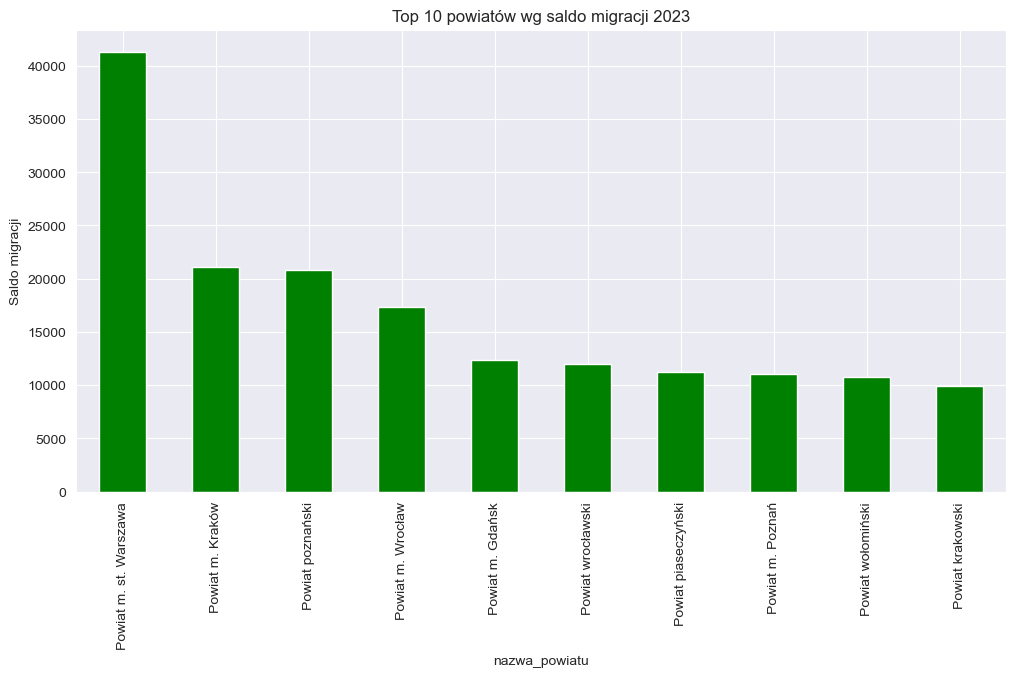

In [29]:
from matplotlib import pyplot as plt

df_mig_top = df_migracje_final[df_migracje_final['rok']==2023].groupby('nazwa_powiatu')['liczba_osob'].sum().sort_values(ascending=False).head(10)
df_mig_top.plot(kind='bar', figsize=(12,6), color='green', title='Top 10 powiatów wg saldo migracji 2023')
plt.ylabel('Saldo migracji')
plt.show()
